In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

In [3]:
bn = gum.InfluenceDiagram()
print(bn)

Influence Diagram{
  chance: 0,
  utility: 0,
  decision: 0,
  arcs: 0,
  domainSize: 1
}


In [11]:
bn = gum.InfluenceDiagram()
#Add nodes
HD = bn.add(gum.LabelizedVariable('Heart Disease','Heart Disease',0).addLabel('No').addLabel('Yes'))
CPT = bn.add(gum.LabelizedVariable('Chest Pain Type','Chest Pain Type',0).addLabel('ASY').addLabel('ATA').addLabel('NAP').addLabel('TA'))
#sex = bn.add(gum.LabelizedVariable('Sex','Patient Gender',0).addLabel("M").addLabel("F"))
STSlope = bn.add(gum.LabelizedVariable('ST Slope','Slope of peak exercise ST segment',0).addLabel("Down").addLabel("Flat").addLabel("Up"))
#diabetic = bn.add(gum.LabelizedVariable('Diabetic','Fasting Blood Sugar',0).addLabel("No").addLabel("Yes"))
ExAngina = bn.add(gum.LabelizedVariable('Excercise Angina','Exercise induce Angina',0).addLabel("No").addLabel("Yes"))
#restingECG = bn.add(gum.LabelizedVariable('RestingECG','Resting Electrocardiogram Results',0).addLabel("LVH").addLabel("Normal").addLabel("ST"))
age = bn.add(gum.LabelizedVariable('Age','Patient Age Range in Years',0).addLabel("20s").addLabel("30s").addLabel("40s").addLabel("50s").addLabel("60s").addLabel("70s"))
RBP = bn.add(gum.LabelizedVariable('Resting BP','Resting blood pressure',0).addLabel("Normal").addLabel("Elevated").addLabel("High").addLabel("Extreme"))
OP = bn.add(gum.LabelizedVariable('Old Peak','Old Peak',0).addLabel("Normal").addLabel("Risk"))
#maxHR = bn.add(gum.LabelizedVariable('Max HR','Maximum Heart Rate',0).addLabel("60-79").addLabel("80-99").addLabel("100-119").addLabel("120-139").addLabel("140-159").addLabel("160-179").addLabel("180-199").addLabel("200-219"))
#cholesterol = bn.add(gum.LabelizedVariable('Cholesterol','Cholesterol Categories',0).addLabel("<200").addLabel("200-239").addLabel(">240"))

#Add Arcs
#bn.addArc(sex,cholesterol)
#bn.addArc(cholesterol,restingECG)
#bn.addArc(diabetic,cholesterol)
#bn.addArc(cholesterol,HD)
bn.addArc(age,RBP)
bn.addArc(age,STSlope)
#bn.addArc(STSlope,maxHR)
#bn.addArc(maxHR,HD)
bn.addArc(STSlope,HD)
bn.addArc(STSlope,ExAngina)
bn.addArc(ExAngina,OP)
bn.addArc(CPT,ExAngina)
bn.addArc(CPT,HD)


#Add utility and action nodes
u = bn.addUtilityNode(gum.LabelizedVariable("U","Utility", 1))
action = bn.addDecisionNode(gum.LabelizedVariable("Intervene", "Medical Intervention",2))

bn.addArc(HD,u)
bn.addArc(action,u)

In [12]:
#WORKING
bn.cpt(age).fillWith([0.007092,0.086879,0.246454,0.413121,0.210993,0.035461])
bn.cpt(STSlope)[:]=[[0.000000,0.000000,1.000000],[0.040816,0.346939,0.612245],[0.028777,	0.424460,	0.546763],[0.064378,	0.510730,	0.424893],[0.092437,	0.655462,	0.252101],[0.300000,	0.550000,	0.150000]]
bn.cpt(RBP)[:]=[[0.000000,	0.250000,	0.500000,	0.250000],[0.285714,	0.346939,	0.163265,	0.204082],[0.223022,	0.244604,	0.237410,	0.294964],[0.103004,	0.240343,	0.248927,	0.407725],[0.100840,	0.176471,	0.235294,	0.487395],[0.050000,	0.150000,	0.150000,	0.650000]]
#bn.cpt(diabetic).fillWith([0.812057, 0.187943])
#bn.cpt(cholesterol)[:] = [[0.216157,0.338428,0.445415],[0.150943,0.358491,0.490566]]
#bn.cpt(maxHR)[:] =[[0.026316,	0.052632,	0.289474,	0.184211,	0.342105,	0.052632,	0.052632,	0.000000],[0.007042,	0.091549,	0.221831,	0.334507,	0.239437,	0.084507,	0.021127,	0.000000],[0.000000,	0.020661,	0.086777,	0.202479,	0.297521,	0.314050,	0.074380,	0.004132]]
#bn.cpt(restingECG)[:]=[[0.182609,	0.643478,	0.173913],[0.207254,	0.601036,	0.191710],[0.265625,	0.570312,	0.164062]]
bn.cpt(CPT).fillWith([0.546099,	0.189716,	0.207447,	0.056738])
bn.cpt(ExAngina)[:]=[[[0.071429,	0.928571],[0.260000,	0.740000],[0.675000,	0.325000]],[[1.000000,	0.000000],[0.578947,	0.421053],[0.965116,	0.034884]],[[1.000000,	0.000000],[0.479167,	0.520833],[0.921875,	0.078125]],[[1.000000,	0.000000],[0.764706,	0.235294],[0.833333,	0.166667]]]
bn.cpt(OP)[:]=[[0.940063,	0.059937],[0.773279,	0.226721]]
bn.cpt(HD)[:]=[[[0.071429,	0.928571],[0.075000,	0.925000],[0.600000,	0.400000]],[[0.500000,	0.500000],[0.315789,	0.684211],[0.965116,	0.034884]],[[0.800000,	0.200000],[0.250000,	0.750000],[0.937500,	0.062500]],[[0.666667,	0.333333],[0.352941,	0.647059],[0.750000,	0.250000]]]

In [81]:
(bn.cpt(STSlope))

(pyAgrum.Potential<double>@000001A8D0034480) 
      ||  ST Slope                   |
Age   ||Down     |Flat     |Up       |
------||---------|---------|---------|
20s   || 0.0000  | 0.0000  | 1.0000  |
30s   || 0.0408  | 0.3469  | 0.6122  |
40s   || 0.0288  | 0.4245  | 0.5468  |
50s   || 0.0644  | 0.5107  | 0.4249  |
60s   || 0.0924  | 0.6555  | 0.2521  |
70s   || 0.3000  | 0.5500  | 0.1500  |

In [14]:
bn

(pyAgrum.InfluenceDiagram<double>@000001A8CFB490D0) Influence Diagram{
  chance: 7,
  utility: 1,
  decision: 1,
  arcs: 9,
  domainSize: 4608
}

In [54]:
bn.utility(u)[{'Heart Disease':'No', 'Intervene':0}] = 70
bn.utility(u)[{'Heart Disease':'No', 'Intervene':1}] = -70
bn.utility(u)[{'Heart Disease':'Yes', 'Intervene':0}] = -100
bn.utility(u)[{'Heart Disease':'Yes', 'Intervene':1}] = 100

In [74]:
ie = gum.ShaferShenoyLIMIDInference(bn)
ie.setEvidence({'Age': '20s', 'ST Slope': "Down"})
ie.makeInference()

In [75]:
ie.optimalDecision("Intervene")

(pyAgrum.Potential<double>@000001A8D07EB420) 
  Intervene        |
0        |1        |
---------|---------|
 1.0000  | 0.0000  |

In [76]:
ie.posteriorUtility("Intervene")

(pyAgrum.Potential<double>@000001A8CFBFA1C8) 
  Intervene        |
0        |1        |
---------|---------|
 0.0000  | 0.0000  |

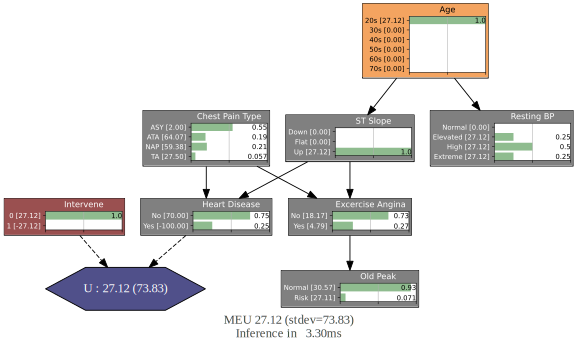

In [80]:
gnb.showInference(bn, evs={'Age':'20s'})